In [40]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.io.json import json_normalize
import numpy as np
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from scipy.stats import skew, kurtosis, entropy, iqr, median_abs_deviation
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.io.json import json_normalize
import numpy as np
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from scipy.stats import skew, kurtosis, entropy, iqr, median_abs_deviation
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from math import sqrt
import sklearn.metrics as metrics
import sklearn.metrics as sm
from sklearn.model_selection import GridSearchCV

In [41]:
def open_datos(url):
    with open(url, 'r') as file:
        json_data = json.load(file)
    df = pd.DataFrame(json_data)
    return df


def find_signals(time_series):
    start_index = None
    max_abs_val = None
    signals = []
    
    for i, value in enumerate(time_series):
        if start_index is None and value <= -0.06:
            start_index = i
            max_abs_val = value
        elif start_index is not None:
            if value < max_abs_val:
                max_abs_val = value
            
            if value >= 0.03:
                signals.append((start_index, i, max_abs_val))
                start_index = None
                max_abs_val = None
    
    df = pd.DataFrame(signals, columns=['Start index', 'End index', 'Maximum Abs Value'])
    df["Duracion_Trade"]=df["End index"]-df["Start index"]
    return df

In [42]:
data=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_CSV/AL30_COMPLETE_TASAS.csv")

In [43]:
time_series = pd.DataFrame(columns=['date','spread'])
# modifiique los nombres así era más claro

#APLICAR EXPONENTE HURST
data["SPREAD_COLOCAR_PLAZO_CERCANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)
data["SPREAD_COLOCAR_PLAZO_LEJANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)

data["SPREAD_TOMAR_PLAZO_CERCANO"] =data["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100) 
data["SPREAD_TOMAR_PLAZO_LEJANO"] = data["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)

data_general=data[["caucion_a_un_dia_ultimo_trade_tasa","SPREAD_COLOCAR_PLAZO_CERCANO","SPREAD_COLOCAR_PLAZO_LEJANO","SPREAD_TOMAR_PLAZO_CERCANO","SPREAD_TOMAR_PLAZO_LEJANO"]]

threshold_arbitrage=0

for index, row in data_general.iterrows():
    #Elegimos el mejor spread para colocar y tomar
    if  row["SPREAD_COLOCAR_PLAZO_CERCANO"] > row["SPREAD_COLOCAR_PLAZO_LEJANO"]:
         spread_colocar = row["SPREAD_COLOCAR_PLAZO_CERCANO"]
    else:
        spread_colocar = row["SPREAD_COLOCAR_PLAZO_LEJANO"]

    if row["SPREAD_TOMAR_PLAZO_CERCANO"] < row["SPREAD_TOMAR_PLAZO_LEJANO"]:
        spread_tomar = row["SPREAD_TOMAR_PLAZO_CERCANO"]

    else:
        spread_tomar = row["SPREAD_TOMAR_PLAZO_LEJANO"]

    # CASO NO PASA NADA
    if row["SPREAD_COLOCAR_PLAZO_CERCANO"] < threshold_arbitrage and row["SPREAD_COLOCAR_PLAZO_LEJANO"] < threshold_arbitrage  and row["SPREAD_TOMAR_PLAZO_CERCANO"] > threshold_arbitrage and row["SPREAD_TOMAR_PLAZO_LEJANO"] > threshold_arbitrage:
        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[0]})],ignore_index=True)
        
    elif spread_colocar > 0 and spread_tomar < 0:

        if spread_colocar > -spread_tomar:
            
            time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_colocar]})],ignore_index=True)
        
        else:

            time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_tomar]})],ignore_index=True)

    elif spread_colocar > 0:

        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_colocar]})],ignore_index=True)

    elif spread_tomar < 0:

        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_tomar]})],ignore_index=True)
    else:
        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[0]})],ignore_index=True)

In [44]:
x=time_series["spread"]
y=data_general=data[["SPREAD_COLOCAR_PLAZO_CERCANO","SPREAD_COLOCAR_PLAZO_LEJANO","SPREAD_TOMAR_PLAZO_CERCANO","SPREAD_TOMAR_PLAZO_LEJANO"]]

In [34]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis

data = y
short_window = 10  # Define the short-term window
long_window = 60   # Define the long-term window

# Calculate the rolling kurtosis for each column
data["SPREAD_COLOCAR_PLAZO_CERCANO_KURTOSIS_SHORT"] = data["SPREAD_COLOCAR_PLAZO_CERCANO"].rolling(window=short_window).apply(kurtosis, raw=True)
data["SPREAD_COLOCAR_PLAZO_LEJANO_KURTOSIS_SHORT"] = data["SPREAD_COLOCAR_PLAZO_LEJANO"].rolling(window=short_window).apply(kurtosis, raw=True)
data["SPREAD_TOMAR_PLAZO_CERCANO_KURTOSIS_SHORT"] = data["SPREAD_TOMAR_PLAZO_CERCANO"].rolling(window=short_window).apply(kurtosis, raw=True)
data["SPREAD_TOMAR_PLAZO_LEJANO_KURTOSIS_SHORT"] = data["SPREAD_TOMAR_PLAZO_LEJANO"].rolling(window=short_window).apply(kurtosis, raw=True)

data["SPREAD_COLOCAR_PLAZO_CERCANO_KURTOSIS_LONG"] = data["SPREAD_COLOCAR_PLAZO_CERCANO"].rolling(window=long_window).apply(kurtosis, raw=True)
data["SPREAD_COLOCAR_PLAZO_LEJANO_KURTOSIS_LONG"] = data["SPREAD_COLOCAR_PLAZO_LEJANO"].rolling(window=long_window).apply(kurtosis, raw=True)
data["SPREAD_TOMAR_PLAZO_CERCANO_KURTOSIS_LONG"] = data["SPREAD_TOMAR_PLAZO_CERCANO"].rolling(window=long_window).apply(kurtosis, raw=True)
data["SPREAD_TOMAR_PLAZO_LEJANO_KURTOSIS_LONG"] = data["SPREAD_TOMAR_PLAZO_LEJANO"].rolling(window=long_window).apply(kurtosis, raw=True)

data["SCORE"] = 0

# Compare the short-term and long-term kurtosis
data.loc[data["SPREAD_COLOCAR_PLAZO_CERCANO_KURTOSIS_SHORT"] > data["SPREAD_COLOCAR_PLAZO_CERCANO_KURTOSIS_LONG"].quantile(0.50), "SCORE"] += 1
data.loc[data["SPREAD_COLOCAR_PLAZO_LEJANO_KURTOSIS_SHORT"] > data["SPREAD_COLOCAR_PLAZO_LEJANO_KURTOSIS_LONG"].quantile(0.50), "SCORE"] += 1
data.loc[data["SPREAD_COLOCAR_PLAZO_CERCANO_KURTOSIS_SHORT"] > data["SPREAD_COLOCAR_PLAZO_CERCANO_KURTOSIS_LONG"].quantile(0.65), "SCORE"] += 1
data.loc[data["SPREAD_COLOCAR_PLAZO_LEJANO_KURTOSIS_SHORT"] > data["SPREAD_COLOCAR_PLAZO_LEJANO_KURTOSIS_LONG"].quantile(0.65), "SCORE"] += 1
data.loc[data["SPREAD_COLOCAR_PLAZO_CERCANO_KURTOSIS_SHORT"] > data["SPREAD_COLOCAR_PLAZO_CERCANO_KURTOSIS_LONG"].quantile(0.80), "SCORE"] += 1
data.loc[data["SPREAD_COLOCAR_PLAZO_LEJANO_KURTOSIS_SHORT"] > data["SPREAD_COLOCAR_PLAZO_LEJANO_KURTOSIS_LONG"].quantile(0.80), "SCORE"] += 1


data.loc[data["SPREAD_TOMAR_PLAZO_CERCANO_KURTOSIS_SHORT"] > data["SPREAD_TOMAR_PLAZO_CERCANO_KURTOSIS_LONG"].quantile(0.50), "SCORE"] += 1
data.loc[data["SPREAD_TOMAR_PLAZO_LEJANO_KURTOSIS_SHORT"] > data["SPREAD_TOMAR_PLAZO_LEJANO_KURTOSIS_LONG"].quantile(0.50), "SCORE"] += 1
data.loc[data["SPREAD_TOMAR_PLAZO_CERCANO_KURTOSIS_SHORT"] > data["SPREAD_TOMAR_PLAZO_CERCANO_KURTOSIS_LONG"].quantile(0.65), "SCORE"] += 1
data.loc[data["SPREAD_TOMAR_PLAZO_LEJANO_KURTOSIS_SHORT"] > data["SPREAD_TOMAR_PLAZO_LEJANO_KURTOSIS_LONG"].quantile(0.65), "SCORE"] += 1
data.loc[data["SPREAD_TOMAR_PLAZO_CERCANO_KURTOSIS_SHORT"] > data["SPREAD_TOMAR_PLAZO_CERCANO_KURTOSIS_LONG"].quantile(0.80), "SCORE"] += 1
data.loc[data["SPREAD_TOMAR_PLAZO_LEJANO_KURTOSIS_SHORT"] > data["SPREAD_TOMAR_PLAZO_LEJANO_KURTOSIS_LONG"].quantile(0.80), "SCORE"] += 1


data.dropna(inplace=True)


In [35]:
final_df=pd.DataFrame()
final_df["Total_Spread"]=x
final_df["Total_Score_Parametro_1_negativo"]=data["SCORE"]

time_series = final_df["Total_Spread"]
result = find_signals(time_series)

df_1 = result
df_2 = final_df["Total_Score_Parametro_1_negativo"]
indices = df_1["Start index"].values
df_score_spread = df_2.loc[indices]

df_score_filtrado=pd.DataFrame(df_score_spread)
result["Score_Inicio_Trade"]=df_score_filtrado["Total_Score_Parametro_1_negativo"].values

result_sorted = result.sort_values('Maximum Abs Value', ascending=True)
result_sorted.dropna(inplace=True)

result_sorted

,Start index,End index,Maximum Abs Value,Duracion_Trade,Score_Inicio_Trade
2,240,1549,-3.311920,1309,1.0
8,2615,3503,-3.006852,888,3.0
6,1571,2506,-1.358197,935,0.0
33,5326,5587,-1.087408,261,0.0
4,1554,1563,-0.871009,9,6.0
32,4952,5324,-0.631199,372,0.0
5,1565,1570,-0.399987,5,3.0
10,3528,3655,-0.377281,127,3.0
7,2507,2608,-0.376510,101,3.0
18,3719,4444,-0.361816,725,0.0


In [36]:
result_filter=result_sorted[result_sorted["Duracion_Trade"]<30]
result_filter

,Start index,End index,Maximum Abs Value,Duracion_Trade,Score_Inicio_Trade
4,1554,1563,-0.871009,9,6.0
5,1565,1570,-0.399987,5,3.0
9,3507,3527,-0.357448,20,0.0
14,3683,3692,-0.241893,9,1.0
12,3669,3671,-0.212930,2,0.0
3,1551,1552,-0.211301,1,6.0
13,3672,3681,-0.199302,9,0.0
11,3658,3667,-0.196181,9,3.0
30,4934,4944,-0.167277,10,3.0
21,4765,4777,-0.152074,12,10.0


<Axes: >

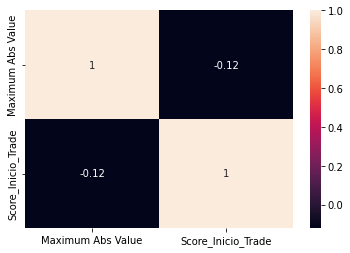

In [37]:
sns.heatmap(result_filter[["Maximum Abs Value","Score_Inicio_Trade"]].corr(),annot=True)

In [38]:
x=result_filter[['Maximum Abs Value']]
y=result_filter['Score_Inicio_Trade']

sc=StandardScaler().fit(x)
x_sc=sc.transform(x)

lm=LinearRegression()
lm.fit(x_sc, y)
predictions=lm.predict(x_sc)

print("Mean absolute error =", round(sm.mean_absolute_error(y, predictions), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y, predictions), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y, predictions), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y, predictions), 2)) 
print("R2 score =", round(sm.r2_score(y, predictions), 2))

Mean absolute error = 2.58
Mean squared error = 11.5
Median absolute error = 2.53
Explain variance score = 0.01
R2 score = 0.01


# SKEWNESS

In [12]:
import pandas as pd
import numpy as np
from scipy.stats import skew

data = y
short_window = 10  # Define the short-term window
long_window = 60   # Define the long-term window

# Calculate the rolling skewness for each column
data["SPREAD_COLOCAR_PLAZO_CERCANO_SKEW_SHORT"] = data["SPREAD_COLOCAR_PLAZO_CERCANO"].rolling(window=short_window).apply(skew, raw=True)
data["SPREAD_COLOCAR_PLAZO_LEJANO_SKEW_SHORT"] = data["SPREAD_COLOCAR_PLAZO_LEJANO"].rolling(window=short_window).apply(skew, raw=True)
data["SPREAD_TOMAR_PLAZO_CERCANO_SKEW_SHORT"] = data["SPREAD_TOMAR_PLAZO_CERCANO"].rolling(window=short_window).apply(skew, raw=True)
data["SPREAD_TOMAR_PLAZO_LEJANO_SKEW_SHORT"] = data["SPREAD_TOMAR_PLAZO_LEJANO"].rolling(window=short_window).apply(skew, raw=True)

data["SPREAD_COLOCAR_PLAZO_CERCANO_SKEW_LONG"] = data["SPREAD_COLOCAR_PLAZO_CERCANO"].rolling(window=long_window).apply(skew, raw=True)
data["SPREAD_COLOCAR_PLAZO_LEJANO_SKEW_LONG"] = data["SPREAD_COLOCAR_PLAZO_LEJANO"].rolling(window=long_window).apply(skew, raw=True)
data["SPREAD_TOMAR_PLAZO_CERCANO_SKEW_LONG"] = data["SPREAD_TOMAR_PLAZO_CERCANO"].rolling(window=long_window).apply(skew, raw=True)
data["SPREAD_TOMAR_PLAZO_LEJANO_SKEW_LONG"] = data["SPREAD_TOMAR_PLAZO_LEJANO"].rolling(window=long_window).apply(skew, raw=True)

data["SCORE"] = 0

# Compare the short-term and long-term skewness
data.loc[data["SPREAD_COLOCAR_PLAZO_CERCANO_SKEW_SHORT"] >= data["SPREAD_COLOCAR_PLAZO_CERCANO_SKEW_LONG"].quantile(0.50), "SCORE"] += 1
data.loc[data["SPREAD_COLOCAR_PLAZO_LEJANO_SKEW_SHORT"] >= data["SPREAD_COLOCAR_PLAZO_LEJANO_SKEW_LONG"].quantile(0.50), "SCORE"] += 1
data.loc[data["SPREAD_COLOCAR_PLAZO_CERCANO_SKEW_SHORT"] > data["SPREAD_COLOCAR_PLAZO_CERCANO_SKEW_LONG"].quantile(0.65), "SCORE"] += 1
data.loc[data["SPREAD_COLOCAR_PLAZO_LEJANO_SKEW_SHORT"] > data["SPREAD_COLOCAR_PLAZO_LEJANO_SKEW_LONG"].quantile(0.65), "SCORE"] += 1
data.loc[data["SPREAD_COLOCAR_PLAZO_CERCANO_SKEW_SHORT"] > data["SPREAD_COLOCAR_PLAZO_CERCANO_SKEW_LONG"].quantile(0.80), "SCORE"] += 1
data.loc[data["SPREAD_COLOCAR_PLAZO_LEJANO_SKEW_SHORT"] > data["SPREAD_COLOCAR_PLAZO_LEJANO_SKEW_LONG"].quantile(0.80), "SCORE"] += 1


data.loc[data["SPREAD_TOMAR_PLAZO_CERCANO_SKEW_SHORT"] < data["SPREAD_TOMAR_PLAZO_CERCANO_SKEW_LONG"].quantile(0.50), "SCORE"] += 1
data.loc[data["SPREAD_TOMAR_PLAZO_LEJANO_SKEW_SHORT"] < data["SPREAD_TOMAR_PLAZO_LEJANO_SKEW_LONG"].quantile(0.50), "SCORE"] += 1
data.loc[data["SPREAD_TOMAR_PLAZO_CERCANO_SKEW_SHORT"] < data["SPREAD_TOMAR_PLAZO_CERCANO_SKEW_LONG"].quantile(0.35), "SCORE"] += 1
data.loc[data["SPREAD_TOMAR_PLAZO_LEJANO_SKEW_SHORT"] < data["SPREAD_TOMAR_PLAZO_LEJANO_SKEW_LONG"].quantile(0.35), "SCORE"] += 1
data.loc[data["SPREAD_TOMAR_PLAZO_CERCANO_SKEW_SHORT"] < data["SPREAD_TOMAR_PLAZO_CERCANO_SKEW_LONG"].quantile(0.20), "SCORE"] += 1
data.loc[data["SPREAD_TOMAR_PLAZO_LEJANO_SKEW_SHORT"] < data["SPREAD_TOMAR_PLAZO_LEJANO_SKEW_LONG"].quantile(0.20), "SCORE"] += 1

data.dropna(inplace=True)


In [13]:
final_df=pd.DataFrame()
final_df["Total_Spread"]=x
final_df["Total_Score_Parametro_1_negativo"]=data["SCORE"]

time_series = final_df["Total_Spread"]
result = find_signals(time_series)

df_1 = result
df_2 = final_df["Total_Score_Parametro_1_negativo"]
indices = df_1["Start index"].values
df_score_spread = df_2.loc[indices]

df_score_filtrado=pd.DataFrame(df_score_spread)
result["Score_Inicio_Trade"]=df_score_filtrado["Total_Score_Parametro_1_negativo"].values

result_sorted = result.sort_values('Maximum Abs Value', ascending=True)
result_sorted.dropna(inplace=True)

result_sorted

,Start index,End index,Maximum Abs Value,Duracion_Trade,Score_Inicio_Trade
2,240,1549,-3.311920,1309,2.0
8,2615,3503,-3.006852,888,6.0
6,1571,2506,-1.358197,935,2.0
33,5326,5587,-1.087408,261,2.0
4,1554,1563,-0.871009,9,5.0
32,4952,5324,-0.631199,372,1.0
5,1565,1570,-0.399987,5,5.0
10,3528,3655,-0.377281,127,5.0
7,2507,2608,-0.376510,101,5.0
18,3719,4444,-0.361816,725,5.0


In [14]:
result_filter=result_sorted[result_sorted["Duracion_Trade"]<30]
result_filter

,Start index,End index,Maximum Abs Value,Duracion_Trade,Score_Inicio_Trade
4,1554,1563,-0.871009,9,5.0
5,1565,1570,-0.399987,5,5.0
9,3507,3527,-0.357448,20,3.0
14,3683,3692,-0.241893,9,3.0
12,3669,3671,-0.212930,2,5.0
3,1551,1552,-0.211301,1,6.0
13,3672,3681,-0.199302,9,4.0
11,3658,3667,-0.196181,9,2.0
30,4934,4944,-0.167277,10,4.0
21,4765,4777,-0.152074,12,5.0


<Axes: >

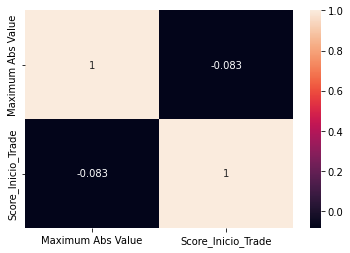

In [15]:
sns.heatmap(result_filter[["Maximum Abs Value","Score_Inicio_Trade"]].corr(),annot=True)

In [18]:
x=result_filter[['Maximum Abs Value']]
y=result_filter['Score_Inicio_Trade']

sc=StandardScaler().fit(x)
x_sc=sc.transform(x)

lm=LinearRegression()
lm.fit(x_sc, y)
predictions=lm.predict(x_sc)

print("Mean absolute error =", round(sm.mean_absolute_error(y, predictions), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y, predictions), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y, predictions), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y, predictions), 2)) 
print("R2 score =", round(sm.r2_score(y, predictions), 2))

Mean absolute error = 1.24
Mean squared error = 2.36
Median absolute error = 1.05
Explain variance score = 0.01
R2 score = 0.01


# PRUEBA SKEW

In [45]:
import pandas as pd
import numpy as np
from scipy.stats import skew

data = y
short_window = 10  # Define the short-term window
long_window = 60   # Define the long-term window

# Calculate the rolling skewness for each column
data["SPREAD_COLOCAR_PLAZO_CERCANO_SKEW_SHORT"] = data["SPREAD_COLOCAR_PLAZO_CERCANO"].rolling(window=short_window).apply(skew, raw=True)
data["SPREAD_COLOCAR_PLAZO_LEJANO_SKEW_SHORT"] = data["SPREAD_COLOCAR_PLAZO_LEJANO"].rolling(window=short_window).apply(skew, raw=True)
data["SPREAD_TOMAR_PLAZO_CERCANO_SKEW_SHORT"] = data["SPREAD_TOMAR_PLAZO_CERCANO"].rolling(window=short_window).apply(skew, raw=True)
data["SPREAD_TOMAR_PLAZO_LEJANO_SKEW_SHORT"] = data["SPREAD_TOMAR_PLAZO_LEJANO"].rolling(window=short_window).apply(skew, raw=True)

data["SPREAD_COLOCAR_PLAZO_CERCANO_SKEW_LONG"] = data["SPREAD_COLOCAR_PLAZO_CERCANO"].rolling(window=long_window).apply(skew, raw=True)
data["SPREAD_COLOCAR_PLAZO_LEJANO_SKEW_LONG"] = data["SPREAD_COLOCAR_PLAZO_LEJANO"].rolling(window=long_window).apply(skew, raw=True)
data["SPREAD_TOMAR_PLAZO_CERCANO_SKEW_LONG"] = data["SPREAD_TOMAR_PLAZO_CERCANO"].rolling(window=long_window).apply(skew, raw=True)
data["SPREAD_TOMAR_PLAZO_LEJANO_SKEW_LONG"] = data["SPREAD_TOMAR_PLAZO_LEJANO"].rolling(window=long_window).apply(skew, raw=True)

data["SCORE"] = 0

# Compare the short-term and long-term skewness
data.loc[data["SPREAD_COLOCAR_PLAZO_CERCANO_SKEW_SHORT"] < data["SPREAD_COLOCAR_PLAZO_CERCANO_SKEW_LONG"].quantile(0.50), "SCORE"] += 1
data.loc[data["SPREAD_COLOCAR_PLAZO_LEJANO_SKEW_SHORT"] < data["SPREAD_COLOCAR_PLAZO_LEJANO_SKEW_LONG"].quantile(0.50), "SCORE"] += 1
data.loc[data["SPREAD_COLOCAR_PLAZO_CERCANO_SKEW_SHORT"] < data["SPREAD_COLOCAR_PLAZO_CERCANO_SKEW_LONG"].quantile(0.35), "SCORE"] += 1
data.loc[data["SPREAD_COLOCAR_PLAZO_LEJANO_SKEW_SHORT"] < data["SPREAD_COLOCAR_PLAZO_LEJANO_SKEW_LONG"].quantile(0.35), "SCORE"] += 1
data.loc[data["SPREAD_COLOCAR_PLAZO_CERCANO_SKEW_SHORT"] < data["SPREAD_COLOCAR_PLAZO_CERCANO_SKEW_LONG"].quantile(0.20), "SCORE"] += 1
data.loc[data["SPREAD_COLOCAR_PLAZO_LEJANO_SKEW_SHORT"] < data["SPREAD_COLOCAR_PLAZO_LEJANO_SKEW_LONG"].quantile(0.20), "SCORE"] += 1


data.loc[data["SPREAD_TOMAR_PLAZO_CERCANO_SKEW_SHORT"] > data["SPREAD_TOMAR_PLAZO_CERCANO_SKEW_LONG"].quantile(0.50), "SCORE"] += 1
data.loc[data["SPREAD_TOMAR_PLAZO_LEJANO_SKEW_SHORT"] > data["SPREAD_TOMAR_PLAZO_LEJANO_SKEW_LONG"].quantile(0.50), "SCORE"] += 1
data.loc[data["SPREAD_TOMAR_PLAZO_CERCANO_SKEW_SHORT"] > data["SPREAD_TOMAR_PLAZO_CERCANO_SKEW_LONG"].quantile(0.65), "SCORE"] += 1
data.loc[data["SPREAD_TOMAR_PLAZO_LEJANO_SKEW_SHORT"] > data["SPREAD_TOMAR_PLAZO_LEJANO_SKEW_LONG"].quantile(0.65), "SCORE"] += 1
data.loc[data["SPREAD_TOMAR_PLAZO_CERCANO_SKEW_SHORT"] > data["SPREAD_TOMAR_PLAZO_CERCANO_SKEW_LONG"].quantile(0.80), "SCORE"] += 1
data.loc[data["SPREAD_TOMAR_PLAZO_LEJANO_SKEW_SHORT"] > data["SPREAD_TOMAR_PLAZO_LEJANO_SKEW_LONG"].quantile(0.80), "SCORE"] += 1

data.dropna(inplace=True)

In [46]:
final_df=pd.DataFrame()
final_df["Total_Spread"]=x
final_df["Total_Score_Parametro_1_negativo"]=data["SCORE"]

time_series = final_df["Total_Spread"]
result = find_signals(time_series)

df_1 = result
df_2 = final_df["Total_Score_Parametro_1_negativo"]
indices = df_1["Start index"].values
df_score_spread = df_2.loc[indices]

df_score_filtrado=pd.DataFrame(df_score_spread)
result["Score_Inicio_Trade"]=df_score_filtrado["Total_Score_Parametro_1_negativo"].values

result_sorted = result.sort_values('Maximum Abs Value', ascending=True)
result_sorted.dropna(inplace=True)

result_sorted

,Start index,End index,Maximum Abs Value,Duracion_Trade,Score_Inicio_Trade
2,240,1549,-3.311920,1309,6.0
8,2615,3503,-3.006852,888,6.0
6,1571,2506,-1.358197,935,2.0
33,5326,5587,-1.087408,261,3.0
4,1554,1563,-0.871009,9,5.0
32,4952,5324,-0.631199,372,3.0
5,1565,1570,-0.399987,5,5.0
10,3528,3655,-0.377281,127,5.0
7,2507,2608,-0.376510,101,6.0
18,3719,4444,-0.361816,725,5.0


In [47]:
result_filter=result_sorted[result_sorted["Duracion_Trade"]<30]
result_filter

,Start index,End index,Maximum Abs Value,Duracion_Trade,Score_Inicio_Trade
4,1554,1563,-0.871009,9,5.0
5,1565,1570,-0.399987,5,5.0
9,3507,3527,-0.357448,20,4.0
14,3683,3692,-0.241893,9,6.0
12,3669,3671,-0.212930,2,5.0
3,1551,1552,-0.211301,1,5.0
13,3672,3681,-0.199302,9,4.0
11,3658,3667,-0.196181,9,5.0
30,4934,4944,-0.167277,10,5.0
21,4765,4777,-0.152074,12,5.0


<Axes: >

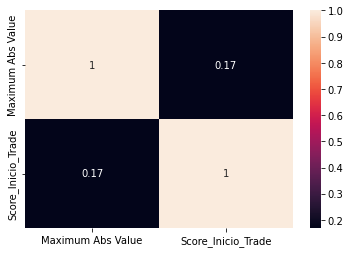

In [48]:
sns.heatmap(result_filter[["Maximum Abs Value","Score_Inicio_Trade"]].corr(),annot=True)

In [49]:
x=result_filter[['Maximum Abs Value']]
y=result_filter['Score_Inicio_Trade']

sc=StandardScaler().fit(x)
x_sc=sc.transform(x)

lm=LinearRegression()
lm.fit(x_sc, y)
predictions=lm.predict(x_sc)

print("Mean absolute error =", round(sm.mean_absolute_error(y, predictions), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y, predictions), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y, predictions), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y, predictions), 2)) 
print("R2 score =", round(sm.r2_score(y, predictions), 2))

Mean absolute error = 0.83
Mean squared error = 1.43
Median absolute error = 0.67
Explain variance score = 0.03
R2 score = 0.03
